<a href="https://colab.research.google.com/github/BradleyAgwa/WEEK-9-IP/blob/main/Titanic_Brad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TITANIC SURVIVOR PREDICTION**

## 1.0 Defining the Question

Using K-Nearest Neighbour can we predict passengers who survived Titanic and those who didn't.

## 1.1 Defining the metric of success

Building a model that can predict if a titanic passenger survived or not with at least 80% accuracy.

## 1.2 Understanding The Context

The Royal Mail Ship(RMS) Titanic was a British ship that sank in the North Atlantic Ocean during her maiden voyage from Southampton to New York. At the time, the Titanic was the largest ship a float and it is no surprise that the tragedy resulted in the death of more than 1500 people out of a total 2,224 passengers and crew members. Some of the factors that contributed to the tragedy involved the weak maritime safety measures that were implemented at the time which meant that the Titanic was permitted to sail while it only carried enough life boats for about 1,178 people. Although much has been done to strengthen the safety regulations of such large ships, the disaster can provide a lesson on some of the key factors that helped the survivors which can be used in future to structure better evacuation plans and mitigate loss of lives.

## 1.3 The Experimental Design

- Load and preview the data set
- Prepare the data
- Perform Exploratory Data Analysis i.e Univariate, Bivariate and Multivariate analysis
- Train the model (K-Nearest-Neighbors)
- Evaluate and optimize the model (Cross-validation & Feature Reduction)
- Draw conclusions and make recommendations

## 2.0 Data Understanding

### Importing Libraries

In [ ]:
# Importing our necessary libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

### Loading the datasets

In [ ]:
# Loading the train and test datasets

train_df=pd.read_csv("/content/train (5).csv")
test_df=pd.read_csv("/content/test (1).csv")

In [ ]:
# Previewing the head of our train_df dataset

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing bottom of the dataset

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking the shape of our datasets
#
print("Train", train_df.shape)
print("*"*15)
print("Test", train_df.shape)

Train (891, 12)
***************
Test (891, 12)


In [ ]:
# Getting column information and data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The cabin column contains a lot of null values.

## 3.0 Data Cleaning

In [ ]:
# Creating a copy to be used for data cleaning.

train=train_df.copy();
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = test_df.copy();
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Checking for duplicates in the dataset

train.duplicated(keep = 'first').any()

False

In [ ]:
test.duplicated(keep = 'first').any()

False

In [ ]:
# Check for null values

print('Train')
print(train.isnull().sum())
print("\n\n")
print('Test')
print(test.isnull().sum())

Train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In the Train dataset, there are 687 null values in the cabin column and 177 in the age column.

In the Test dataset, there are 327 null values in the cabin column and 86 in the age column.

In [ ]:
# Dropping unnecesry columns

test.drop(['Cabin', 'PassengerId'], axis=1, inplace = True)
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


The cabin column was dropped because it contained a lot of null values, while the Passanger ID was dropped because it is not essential to our analysis and models in general.

In [ ]:
# Dropping for the train column

train.drop(['Cabin', 'PassengerId'], axis=1, inplace = True)
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [ ]:
# Filling the null values in age with the mean

train['Age'].fillna((train['Age'].mean()), inplace=True)
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [ ]:
# Checking if there are still any null values.

print('Train')
print(train.isnull().sum())
print("\n\n")
print('Test')
print(test.isnull().sum())

Train
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64



Test
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64


We have one on the fare column in the test dataset and 2 on the embarked column in the train dataset, since the two are quite small numbers we can just leave them as they are.

## 4.0 Exploratory Data Analysis

#### Univariate Analysis

In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(train, title = "Titanic")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- The dataset contains 2 variable types i.e. Numerical - 4, categorical - 6, 

- 342 Passengers survived while 549 didn't.

- Mean age for the passengers was 29, with the maximum age being 80.



In [ ]:
# Specifying our numerical columns

numerics = train[['Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# Checking the Skewness and Kurtosis
for i, col_val in enumerate(numerics.columns):
  print(f"The skewness of {col_val} is: {numerics[col_val].skew()}")
  print(f"The kurtosis of {col_val} is: {numerics[col_val].kurt()}")

The skewness of Age is: 0.4344880940129925
The kurtosis of Age is: 0.9662793026645233
The skewness of SibSp is: 3.6953517271630565
The kurtosis of SibSp is: 17.880419726645968
The skewness of Parch is: 2.7491170471010933
The kurtosis of Parch is: 9.778125179021648
The skewness of Fare is: 4.787316519674893
The kurtosis of Fare is: 33.39814088089868


Values greater than positive 1 indicate that the distribution is too peaked, Fare being with the highest kurtosis of 33.398

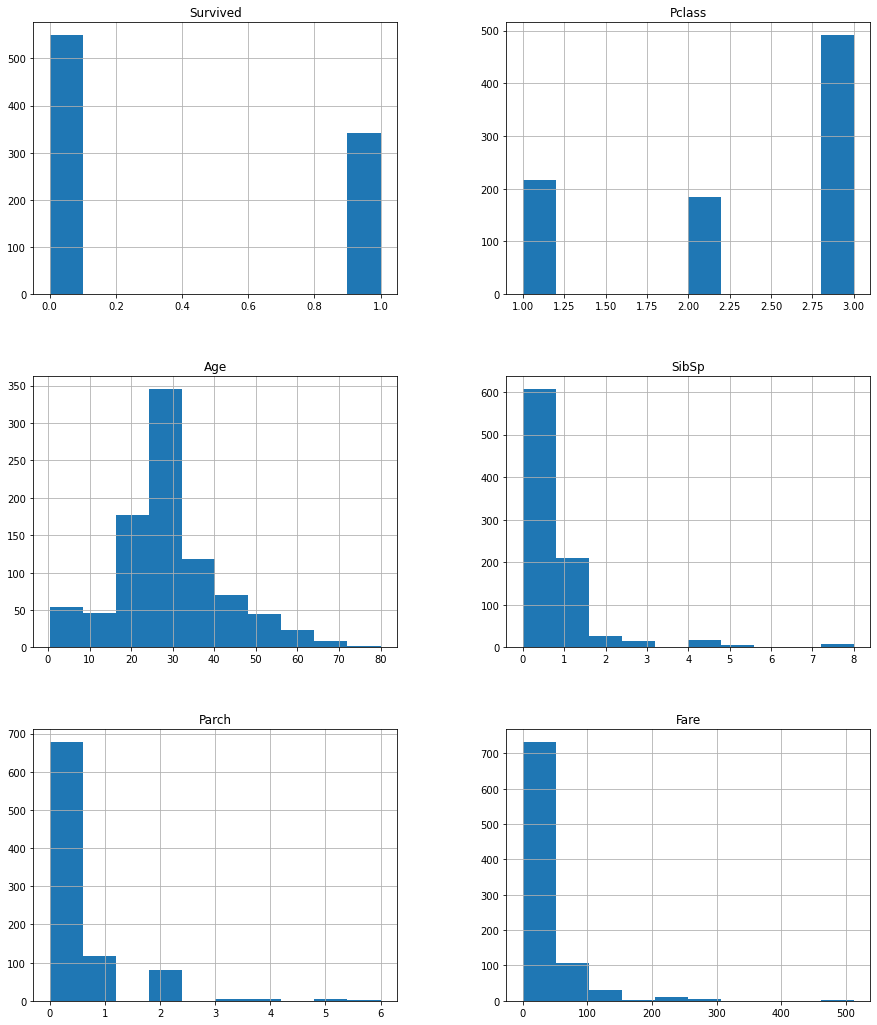

In [ ]:
# Histograms

train.hist(figsize=(15,18))
plt.show()

#### Bivariate Analysis

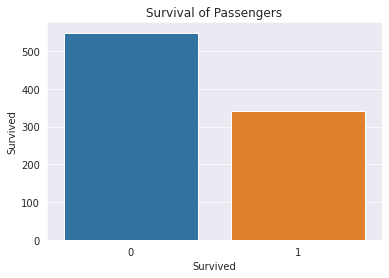

In [ ]:
# Plotting a barplot showing Survival of passengers

survivors =  train['Survived'].value_counts()
sns.barplot(x = train['Survived'], y = survivors)
plt.title('Survival of Passengers')
plt.show()

Less people survived as compared to those that actually didn't.

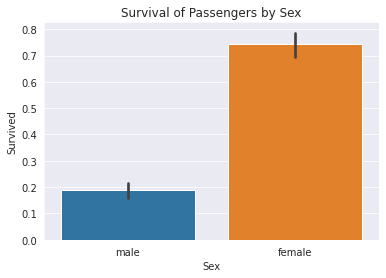

In [ ]:
# Barplot showing survival by sex.

sns.barplot(x="Sex", y="Survived", data=train)
plt.title('Survival of Passengers by Sex')
plt.show()

More females survived as compared to their male counterparts, this could be because the females were given a priority on the rescue boats.

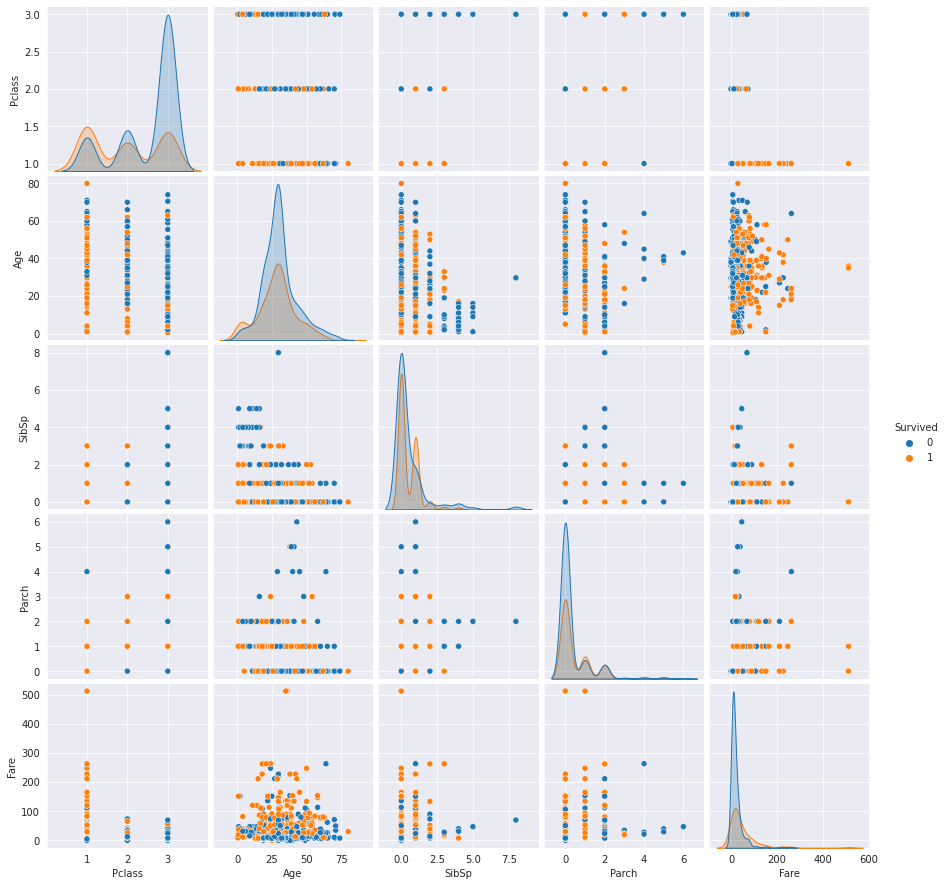

In [ ]:
# Plotting the bivariate summaries

sns.pairplot(train, hue = 'Survived')
plt.show();

In [ ]:
# Creating a dataset of only non survivors
Not_Survived = train[train['Survived']==0]

# Creating a dataset of only survivors
Survived = train[train['Survived']==1]

Number of passangers per class
3    491
1    216
2    184
Name: Pclass, dtype: int64 




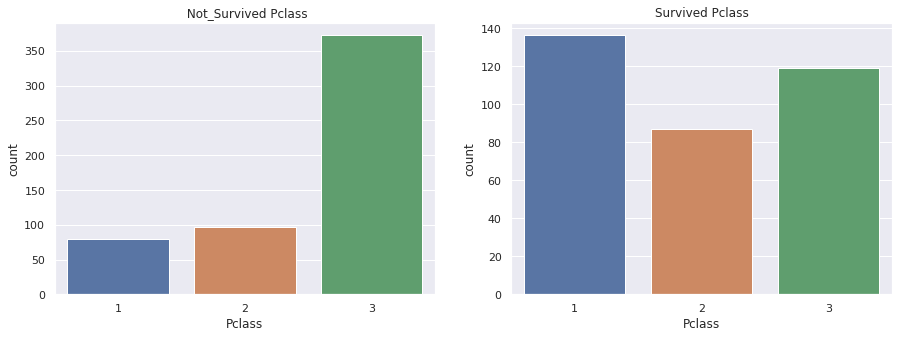

In [ ]:
# Compare survival of passagers based on Pclass

# Distribution of passagers across the three classes
x=train['Pclass'].value_counts()
print('Number of passangers per class')
print(x, '\n\n')

# Plot
sns.set(rc={'figure.figsize':(15,5)})
fig , ax = plt.subplots(1,2)
sns.countplot(Not_Survived['Pclass'], ax = ax[0])
ax[0].set_title(' Not_Survived Pclass',)
sns.countplot(Survived['Pclass'], ax = ax[1])
ax[1].set_title('Survived Pclass')
fig.show()

Most of the passagers on the ship were in Pclass 3. This explains why in the not survived plot, most of them were from Pclass 3.

Count of passanger's point of embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64 




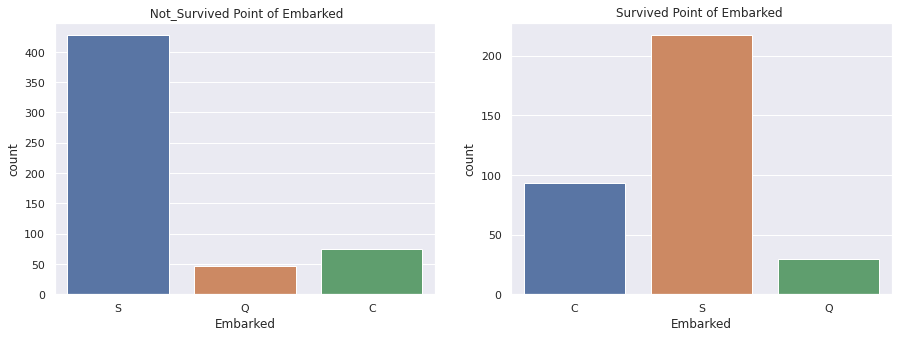

In [ ]:
#Compare survival of passagers based on Point of Embarke

#Count of passanger's Embarked members 
x=train['Embarked'].value_counts()
print("Count of passanger's point of embarked")
print(x, '\n\n')

#Plot
sns.set(rc={'figure.figsize':(15,5)})
fig , ax = plt.subplots(1,2)
sns.countplot(Not_Survived['Embarked'], ax = ax[0])
ax[0].set_title(' Not_Survived Point of Embarked',)
sns.countplot(Survived['Embarked'], ax = ax[1])
ax[1].set_title('Survived Point of Embarked ')
fig.show()

Most of the passangers who embarked at Southampton did not survive.

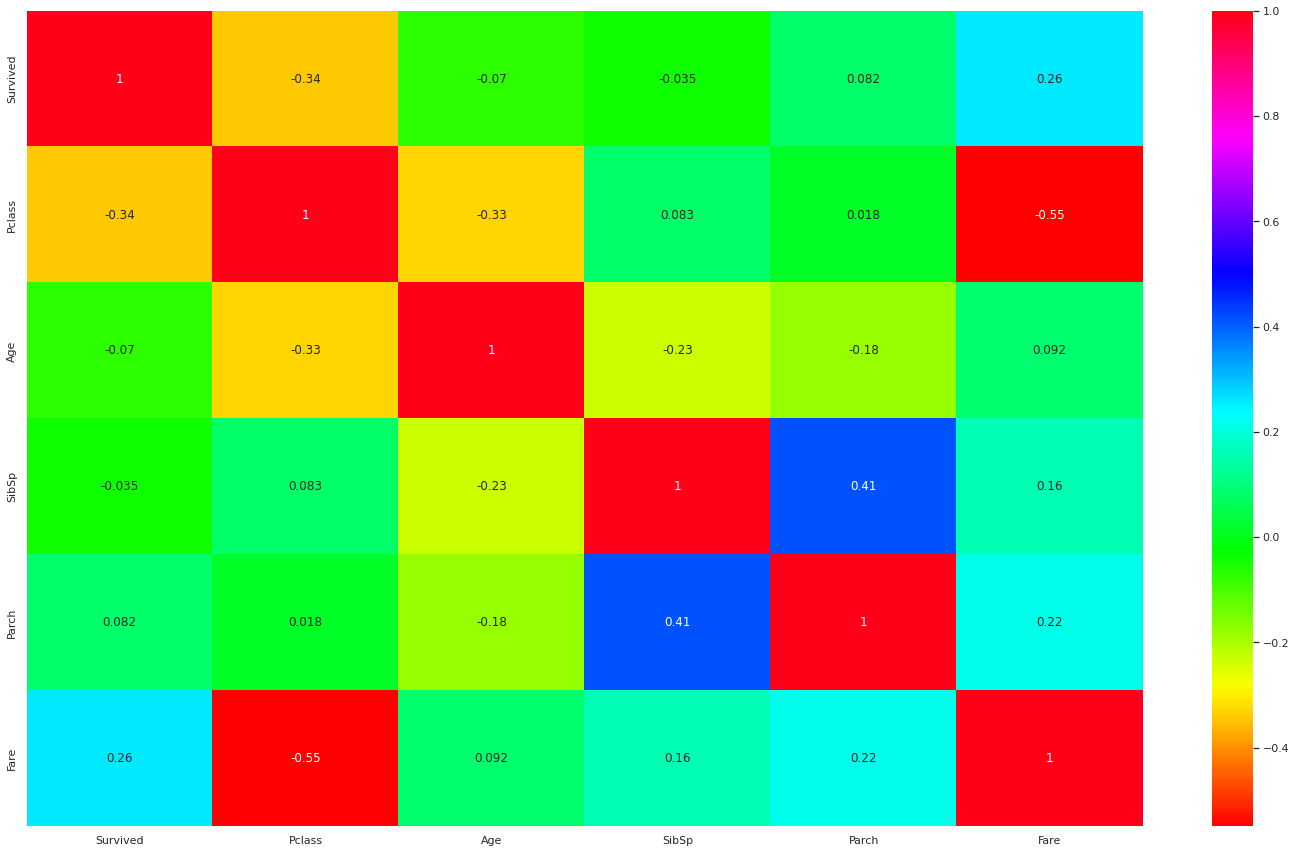

In [ ]:
# Plotting a heatmap to see the correlation between the variables


corr=train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True,cmap="hsv");

## 5.0 Feature Engineering

In [ ]:
# Encoding categorical colimns 
# Converting sex and embarked colunms  to numeric
# 1= male, 0 = female under sex

train['Sex'].replace(['male', 'female'],[1,0],inplace=True)

# C = Cherbourg as -1, Q = Queenstown as 0, S = Southampton as 1
train['Embarked'].replace(['C', 'Q', 'S'],[-1,0,1],inplace=True)

In [ ]:
# Computing the correlation matrix 

train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.169718
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.164681
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.110320
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.028927
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068900
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.040449
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


## 6.0 Modelling

### K-nearest neighbor classification

 **limitation**
 * The accuracy of the algorithm depends on the quality of data
 * one needs to find an optimal k value(number of nearest neighbor)
 * It's poor at classifying data points in a boundary where they can be classified one way or another.

##### Spliting our data 80-20

In [ ]:
# Splitting our dataset into features/ indepedent and labels/ target variables

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = train['Survived'].values

In [ ]:
# Splitting our dataset to training and test data
# Then training the model using 80% of the data and testing it with 20%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# For uniform evaluation

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Finding the best value of k and it must be odd number

math.sqrt(len(y_test))

13.379088160259652

In [ ]:
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# Fitting the KNeighbors classifier model features to the X_train and X_test
# then train the model
classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
# Predict based on the model we've trained

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Model accuracy ",accuracy_score(y_test, y_pred))

[[95 15]
 [20 49]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Model accuracy  0.8044692737430168


80-20 split gave us an accuracy of 80.44%.

##### Spliting our data 70-30

In [ ]:
# Splitting our dataset into features/ indepedent and labels/ target variables

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = train['Survived'].values

In [ ]:
# Splitting our dataset to training and test data
# Then training the model using 70% of the data and testing it with 30%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# For uniform evaluation

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# Fitting the KNeighbors classifier model features to the X_train and X_test
# then train the model

classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
# Predict based on the model we've trained

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Model accuracy ",accuracy_score(y_test, y_pred))

[[145  23]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       168
           1       0.76      0.71      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268

Model accuracy  0.8059701492537313


70-30 split gave us an 80.59% accuracy.

##### Spliting our data 60-40

In [ ]:
# Splitting our dataset into features/ indepedent and labels/ target variables

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = train['Survived'].values

In [ ]:
# Splitting our dataset to training and test data
# Then training the model using 60% of the data and testing it with 40%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# For uniform evaluation

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# Fitting the KNeighbors classifier model features to the X_train and X_test
# then train the model

classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
# Predict based on the model we've trained

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Model accuracy ",accuracy_score(y_test, y_pred))

[[193  28]
 [ 41  95]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       221
           1       0.77      0.70      0.73       136

    accuracy                           0.81       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.80      0.81      0.80       357

Model accuracy  0.8067226890756303


60-40 split gave us an 80.6%. accuary

Splitting our data to 80-20 we get 80.44% accuracy level, 70-30 split gave as 80.59% accuracy, and 60-40 split gave us 80.6%.

The model with the highest accuracy was the one with the 60-40% Split.

## 7.0 Conclusion



The project set objective was achieved by using K-nearest neighbor to create a prediction model which was aimed to get a metrics score of an accuracy score of 80% and higher

Splitting our data to 80-20 we get 80.44% accuracy level, 70-30 split gave as 80.59% accuracy, and 60-40 split gave us 80.6%.

The model with the highest accuracy was the one with the 60-40% Split.

## 8.0 Recommendation
For a better survival rate in case of such occurrances, more lifeboats should be availed. From research there were few such items on board, and as a result only a few number survived, mostly females who were given priority during the rescue mission.

Did we have the right data?

Yes

Do we need other data to answer our question?

No, the data was sufficient.

Did we have the right question?

Yes.